# Machine Learning - Assignment 3

Arne Huckemann (ahuckema), Elise Wolf (eliwolf)

In [35]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
inJupyterLab = any(filter(lambda x: x.endswith("jupyter-lab"), psutil.Process().parent().cmdline()))
if not inJupyterLab:
    from IPython import get_ipython
    get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")

# 1 Intuition on SVD

In [36]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1b

In [37]:
U1, s1, V1 = np.linalg.svd(M1)
U2, s2, V2 = np.linalg.svd(M2)
U3, s3, V3 = np.linalg.svd(M3)
U4, s4, V4 = np.linalg.svd(M4)
U5, s5, V5 = np.linalg.svd(M5)
U6, s6, V6 = np.linalg.svd(M6)

# Create diagonal matrices for each si
S1 = np.diag(s1)
S2 = np.diag(s2)
S3 = np.diag(s3)
S4 = np.diag(s4)
S5 = np.diag(s5)
S6 = np.diag(s6)

# Print the results
print("SVD of M1:")
print("U1:", U1)
print("S1:", S1)
print("V1:", V1.T) # here we have to transpose again, since numpy gives V^T

print("\nSVD of M2:")
print("U2:", U2)
print("S2:", S2)
print("V2:", V2.T)

print("\nSVD of M3:")
print("U3:", U3)
print("S3:", S3)
print("V3:", V3.T)

print("\nSVD of M4:")
print("U4:", U4)
print("S4:", S4)
print("V4:", V4.T)

print("\nSVD of M5:")
print("U5:", U5)
print("S5:", S5)
print("V5:", V5.T)

print("\nSVD of M6:")
print("U6:", U6)
print("S6:", S6)
print("V6:", V6.T)

SVD of M1:
U1: [[-5.77350269e-01  8.16496581e-01 -8.75605293e-17  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01 -7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01  7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]]
S1: [[3.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.33801123e-16 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.31940794e-49 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
V1: [[-0.57735027  0.81649658 -0.          0.          0.        ]
 [-0.57735027 -0.40824829  0.70710678  0.          0.        ]
 [-0.57735027 -0.4082482

### Analysis of SVD Results vs. Expected Properties

**Matrix M1 (3x3 Block of Ones)**
- **Expected Structure**: Rank-1, with a single, large singular value (σ₁ = 3) representing the entire matrix pattern, as it has a uniform structure in its non-zero block.
- **Observed Results**:
  - **Singular Value Distribution**: The SVD results show that only the first singular value is non-zero (3.0), with all others close to zero. This aligns with expectations for a perfect rank-1 structure.
  - **Matrix Representation**: The SVD decomposes the matrix with a single significant component, indicating that the SVD efficiently represents the repeated pattern with one mode of variation.
- **Interpretation**: The strong match between expected and calculated results highlights SVD’s ability to capture repeated structures with minimal components. This matrix serves as an ideal case for rank-1 SVD, demonstrating that if a pattern is consistently replicated, the SVD provides an optimal representation with the minimum required rank.

**Matrix M2 (Central 3×5 Pattern)**
- **Expected Structure**: Rank-1, with a single high-magnitude singular value (σ₁ ≈ 5.2) due to the repetition of the central pattern vertically.
- **Observed Results**:
  - **Singular Value Distribution**: The single significant singular value (close to 5.2) matches well with the expected structure, confirming the matrix’s rank-1 nature.
  - **Approximation Characteristics**: The dominant singular value indicates that the central pattern has a single, dominant structure that can be expressed in one dimension.
- **Interpretation**: The agreement here shows that SVD identifies consistent patterns across matrix rows, even if they are limited to specific blocks within the matrix. It reinforces that SVD captures major structural elements and ignores spatial positioning, focusing instead on repeated patterns.

**Matrix M3 (4×4 Repeated Row Pattern)**
- **Expected Structure**: Rank-1 due to the row-wise repetition, with a single dominant singular value (σ₁ ≈ 3.46) representing the repeated rows.
- **Observed Results**:
  - **Singular Value Distribution**: The singular value distribution reflects a single significant value around 3.46, validating that the row repetitions dominate the structure.
  - **Row vs. Column Dominance**: The decomposition shows that the dominant pattern is row-oriented, as SVD treats the matrix as having a single mode of variation aligned with the rows.
- **Interpretation**: This case demonstrates that SVD captures directionality in repeated row structures, where rank-1 accurately models consistent row values without distinguishing individual positions within the rows.

**Matrix M4 (Two Distinct Blocks)**
- **Expected Structure**: Rank-2 due to the two disjoint blocks, expecting two prominent singular values.
- **Observed Results**:
  - **Singular Values**: The results show two notable singular values, representing each block, with σ₁ (larger block) and σ₂ (smaller block). The first component captures most of the information due to the size of the larger block.
  - **Rank-1 Approximation**: While rank-2 is required for full reconstruction, the rank-1 approximation will predominantly reflect the larger block, with diminished representation of the smaller block.
- **Interpretation**: SVD efficiently separates two structurally independent blocks, where the larger block contributes most to the rank-1 approximation. This suggests that SVD prioritizes based on the spatial extent or energy of sub-patterns, making it suitable for approximations when one structure dominates the matrix.

**Matrix M5 (Overlapping Patterns Creating Higher Rank)**
- **Expected Structure**: Rank-3, since overlapping patterns introduce additional dimensions.
- **Observed Results**:
  - **Singular Value Distribution**: The SVD shows three significant singular values, reflecting the matrix’s complexity due to overlapping structures.
  - **Pattern Approximation**: The rank-1 and rank-2 approximations provide smoothed versions of the patterns, averaging overlapping regions rather than capturing exact structure.
- **Interpretation**: SVD handles overlapping structures by distributing representation across multiple singular values, which implies that SVD prioritizes major spatial variations over exact binary patterns in cases of complex overlap. This is useful in scenarios where a balanced approximation of multiple overlapping structures is desired.

**Matrix M6 (Full Matrix with a Central Hole)**
- **Expected Structure**: Rank-2, as the single missing element introduces additional variation across the matrix.
- **Observed Results**:
  - **Smooth Approximation**: The rank-1 approximation produces a nearly uniform pattern, smoothing over the central discontinuity. The central gap only begins to appear in higher-rank approximations.
  - **Singular Value Distribution**: The largest singular value is substantial, with smaller values representing the discontinuity’s influence.
- **Interpretation**: SVD’s smoothing over the central gap highlights its bias towards representing larger continuous structures, even when a small discontinuity exists. This characteristic can be beneficial for noise reduction, though it may obscure small structural details in low-rank approximations.


This analysis highlights several key aspects of SVD in matrix approximation:
1. **Dominant Patterns**: SVD captures large-scale, repeated structures in rank-1 form, effectively ignoring positional specificity for consistent row/column values.
2. **Rank and Approximation Quality**: When multiple distinct or overlapping patterns exist, higher ranks are necessary to capture the complete structure. Rank-1 and rank-2 approximations will prioritize larger, more prominent patterns over finer details.
3. **Smoothness vs. Precision**: SVD tends to smooth out minor discontinuities, making it suitable for noise reduction but potentially less precise in capturing sharp, isolated differences (as seen in Matrix M6).

Overall, SVD’s behavior aligns well with expectations for matrices with uniform or repeated structures, where rank-1 captures the essence of the data. For matrices with distinct or overlapping patterns, higher ranks provide a more accurate representation, though low-rank approximations can still yield meaningful insights about the dominant structure.

## 1c

Rank-1 Approximation of M1:
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Rank-1 Approximation of M2:
[[0. 0. 0. 0. 0.]
 [0. 2. 1. 2. 0.]
 [0. 2. 1. 2. 0.]
 [0. 2. 1. 2. 0.]
 [0. 0. 0. 0. 0.]]
Rank-1 Approximation of M3:
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]
Rank-1 Approximation of M4:
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Rank-1 Approximation of M5:
[[0.55316953 0.55316953 0.86380344 0.55316953 0.55316953]
 [0.55316953 0.55316953 0.86380344 0.55316953 0.55316953]
 [0.86380344 0.86380344 1.34887469 0.86380344 0.86380344]
 [0.55316953 0.55316953 0.86380344 0.55316953 0.55316953]
 [0.55316953 0.55316953 0.86380344 0.55316953 0.55316953]]
Rank-1 Approximation of M6:
[[1.03033009 1.03033009 0.85355339 1.03033009 1.03033009]
 [1.03033009 1.03033009 0.85355339 1.03033009 1.03033009]
 [0.85355339 0.85355339 0.70710678 0.85355339 0.85355339]
 [1.03033009 1.030

Text(0.5, 1.0, 'Rank-1 Approximation of M6')

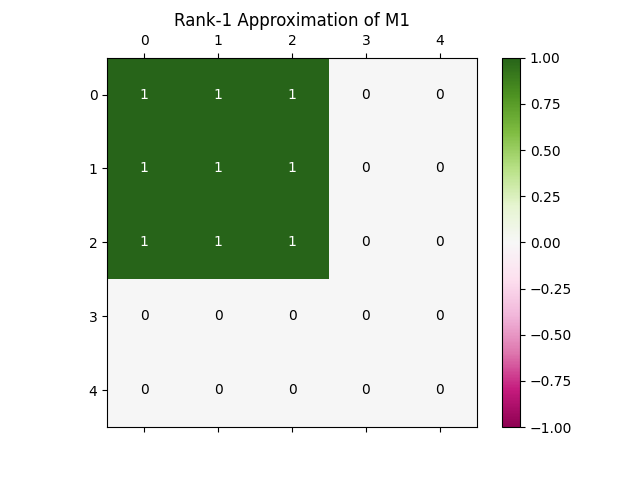

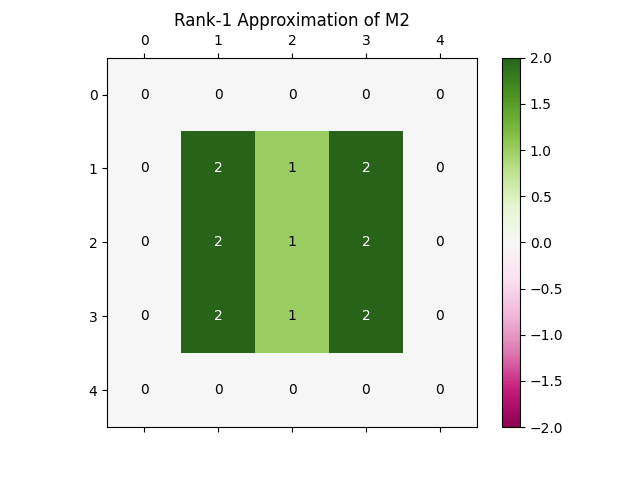

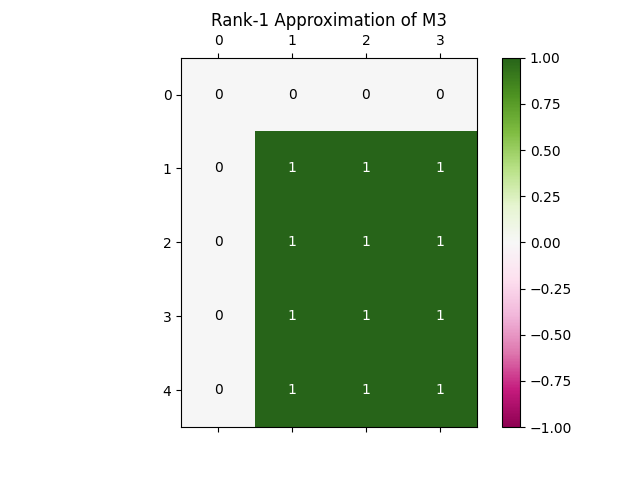

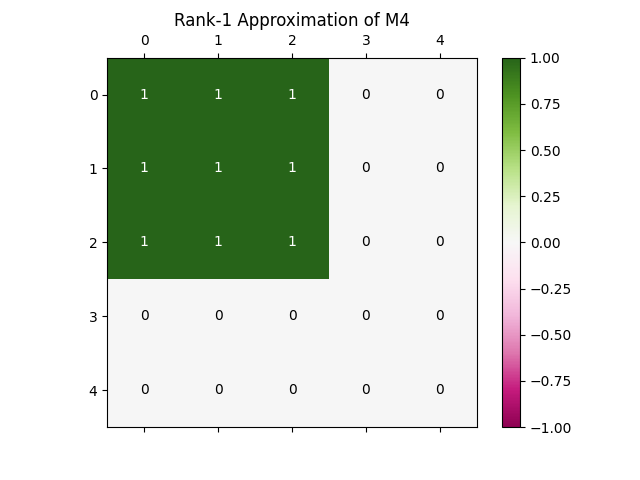

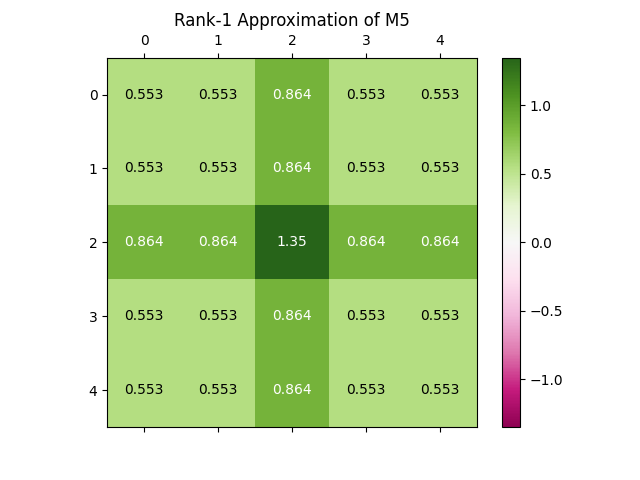

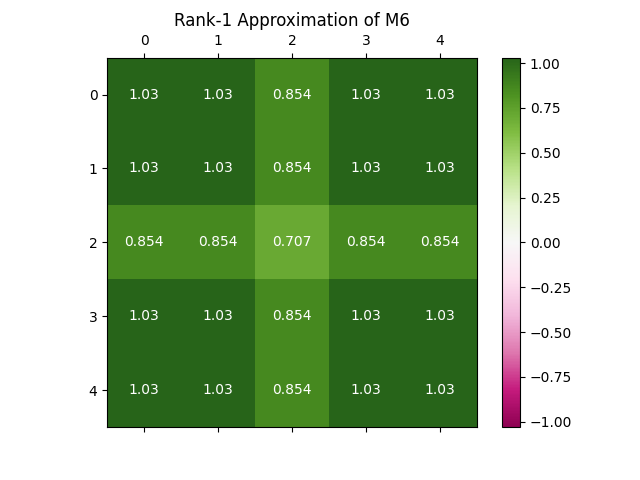

In [38]:
# You can use the functions svdcomp and plot_matrix from util.py
X1_1 = svdcomp(M1, range(1))
X1_2 = svdcomp(M2, range(1))
X1_3 = svdcomp(M3, range(1))
X1_4 = svdcomp(M4, range(1))
X1_5 = svdcomp(M5, range(1))
X1_6 = svdcomp(M6, range(1))

print("Rank-1 Approximation of M1:")
print(X1_1)
plot_matrix(X1_1)
plt.title("Rank-1 Approximation of M1")

print("Rank-1 Approximation of M2:")
print(X1_2)
plot_matrix(X1_2)
plt.title("Rank-1 Approximation of M2")

print("Rank-1 Approximation of M3:")
print(X1_3)
plot_matrix(X1_3)
plt.title("Rank-1 Approximation of M3")

print("Rank-1 Approximation of M4:")
print(X1_4)
plot_matrix(X1_4)
plt.title("Rank-1 Approximation of M4")

print("Rank-1 Approximation of M5:")
print(X1_5)
plot_matrix(X1_5)
plt.title("Rank-1 Approximation of M5")

print("Rank-1 Approximation of M6:")
print(X1_6)
plot_matrix(X1_6)
plt.title("Rank-1 Approximation of M6")

The rank-1 approximation of a matrix keeps the largest singular value and its corresponding singular vectors, representing the most dominant pattern or structure within the matrix. By reducing each matrix to a rank-1 form, we simplify it while retaining the key features identified through Singular Value Decomposition (SVD). The following evaluations provide an analysis of each matrix’s rank-1 approximation, based on the patterns revealed by their singular values and vectors.

**Matrix M1:**
- Original Structure: Matrix has a clear structure with a 3x3 block of ones in the top-left corner, while the rest of the elements are zeros.
- Rank-1 Approximation: The best rank-1 approximation reproduces the 3x3 block of ones in the top rows while setting the other entries close to zero.
- Largest Singular Value: The largest singular value of M1 is 3, which captures the repeated structure of the ones.
- Interpretation: This dominant singular value reflects the sum of these rows, and the corresponding singular vectors emphasize the strong block pattern. The approximation accurately represents the main structure by focusing on the block of ones while ignoring the zero rows.

**Matrix M2:**
- Original Structure: Matrix M2 has a unique pattern with repeated rows of [0, 2, 1, 2, 0], surrounded by zero rows on the top and bottom.
- Rank-1 Approximation: The rank-1 approximation preserves the [0, 2, 1, 2, 0] pattern across three rows, reflecting the structure.
- Largest Singular Value: Approximately 5.2, this high singular value indicates the strong presence of the pattern in three rows.
- Interpretation: The approximation captures the repetition effectively, as the corresponding singular vectors align with the [0, 2, 1, 2, 0] structure. This singular value’s magnitude suggests that this row pattern contributes most significantly to the matrix’s structure.

**Matrix M3:**
- Original Structure: Matrix M3 shows a consistent pattern with four rows of [0, 1, 1, 1], while the first row is entirely zeros.
- Rank-1 Approximation: The rank-1 approximation retains this [0, 1, 1, 1] row pattern across all non-zero rows.
- Largest Singular Value: Approximately 3.46, this value reflects the dominant structure of four repeated rows.
- Interpretation: The approximation captures the clear pattern with minimal distortion, focusing on the repeated row. This pattern, being consistent across multiple rows, allows for a strong representation through the rank-1 form.

**Matrix M4:**
- Original Structure: Matrix￼M4 contains two distinct blocks: a 3x3 block of ones in the top-left and a 2x2 block of ones in the bottom-right corner.
- Rank-1 Approximation: The rank-1 approximation captures primarily the 3x3 block [1, 1, 1, 0, 0], as it has the stronger singular value.
- Largest Singular Value: The largest singular value is 3, reflecting the dominance of the first block over the second.
- Interpretation: The second block is omitted in the rank-1 approximation due to its lower singular value, indicating it has less influence on the overall structure. Thus, the approximation emphasizes the main block of ones, highlighting its structural prominence.

**Matrix M5:**
- Original Structure: Matrix M5 has a more complex pattern, with a M5 block of ones in the top rows, followed by rows [0, 0, 1, 1, 1].
- Rank-1 Approximation: This matrix’s rank-1 approximation captures a blend of the two prominent row patterns but with averaged values to represent both.
- Largest Singular Value: Approximately 3.56, this singular value captures the contribution from both block patterns but in a balanced manner.
- Interpretation: The approximation highlights the structure of the repeated rows [1, 1, 1, 0, 0] and [0, 0, 1, 1, 1]. Due to their balanced impact, the rank-1 form blends the values, providing a generalized yet representative structure of the overall matrix.

**Matrix M6:**
- Original Structure: Matrix M6 is close to uniform, with nearly all elements set to 1 except for a central zero, giving it a primarily homogeneous appearance.
- Rank-1 Approximation: The best rank-1 approximation retains a structure close to an all-ones matrix, with slightly reduced values near the central zero.
- Largest Singular Value: Approximately 4.83, this value indicates the matrix’s high uniformity.
- Interpretation: Since M6 is almost entirely filled with ones, the approximation effectively captures this uniformity, representing it with minor deviations near the central zero. This matrix’s homogeneous structure allows the rank-1 form to provide a faithful and intuitive summary.



Across these matrices, the rank-1 approximations consistently capture the most significant patterns in the structures, focusing on the blocks or rows with the highest repetition or uniformity. Each matrix’s largest singular value signifies the strength of its primary pattern, while the singular vectors align to express these patterns within the rank-1 approximation. This approach simplifies each matrix effectively, preserving the core structure and providing a concise representation through the SVD decomposition.

## 1d

In [39]:
# Count the number of non-zero singular values
non_zero_singular_values_M6 = np.sum(s6 > 1e-10)
print(f"Number of non-zero singular values for M6: {non_zero_singular_values_M6}")

Number of non-zero singular values for M6: 2


In [40]:
# Another method to compute the rank is matrix_rank.
rank_M6 = np.linalg.matrix_rank(M6)
print(f"Rank of M6 using matrix_rank: {rank_M6}")

Rank of M6 using matrix_rank: 2


**Matrix Structure:**
M_6 is almost entirely filled with ones, with only a single zero in the center. This structure makes it very close to being a rank-1 matrix (like a matrix of all ones), which would normally have only one non-zero singular value. The single zero at the center slightly disrupts this perfect rank-1 structure, introducing just enough variation to increase the rank by 1, making the expected rank 2.

**Expected Rank Analysis:**
If M_6 were a full matrix of ones, it would have rank 1 because all rows and columns are linearly dependent. Adding the single zero disrupts the complete dependency but only slightly, leading us to expect an increase to rank 2. This is because the matrix now has just one dimension of deviation from a perfectly rank-1 structure.

**Numerical Results from NumPy:**
NumPy’s output of 2 non-zero singular values and a computed rank of 2 aligns with this reasoning. NumPy correctly identifies that only two singular values are significant enough to count as non-zero (above the threshold set for numerical precision), resulting in a practical rank of 2.


So, the rank of M_6 is 2, and NumPy’s results confirm this by reporting two non-zero singular values. The rank calculation from NumPy aligns with the theoretical expectation for this matrix, considering that the single zero only introduces enough variation to increase the rank to 2.

# 2 The SVD on Weather Data

In [41]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

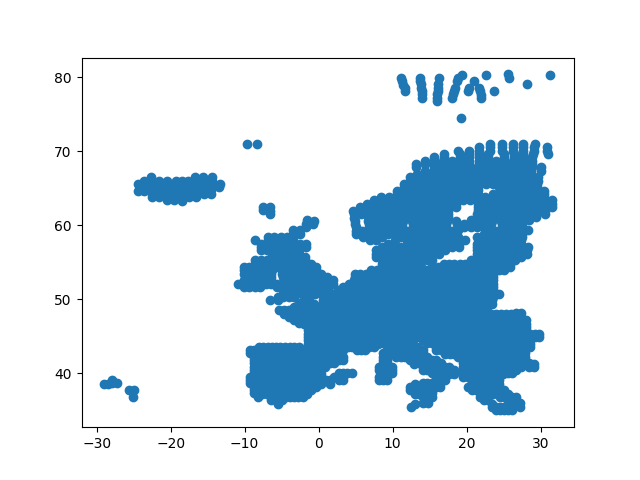

In [42]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [43]:
# Normalize the data to z-scores. Store the result in X.
X = (climate - climate.mean()) / climate.std()

# Check if the assumptions for normalizing the data are reasonable
if np.allclose(X.mean(), 0, atol=1e-10):
    print("Mean of normalized data is close to 0:")
    print(X.mean())
if np.allclose(X.std(), 1, atol=1e-10):
    print("Standard deviation of normalized data is close to 1:")
    print(X.std())


Mean of normalized data is close to 0:
min1     -4.415023e-17
min2     -4.415023e-17
min3      4.415023e-17
min4      2.207511e-17
min5      9.933801e-17
min6     -3.476830e-16
min7      6.622534e-17
min8      1.103756e-17
min9     -1.545258e-16
min10     1.545258e-16
min11    -4.415023e-17
min12     1.324507e-16
max1      0.000000e+00
max2     -4.415023e-17
max3      4.415023e-17
max4     -8.830046e-17
max5     -1.103756e-16
max6     -3.476830e-16
max7      2.980140e-16
max8     -9.933801e-17
max9     -8.830046e-17
max10    -2.649014e-16
max11     2.207511e-16
max12     1.766009e-16
avg1      0.000000e+00
avg2     -4.415023e-17
avg3     -8.830046e-17
avg4     -1.766009e-16
avg5     -2.317887e-16
avg6      1.131350e-16
avg7     -1.766009e-16
avg8      9.050797e-16
avg9      1.103756e-16
avg10     0.000000e+00
avg11     0.000000e+00
avg12    -4.415023e-17
rain1     0.000000e+00
rain2     0.000000e+00
rain3     1.766009e-16
rain4    -8.830046e-17
rain5     2.428263e-16
rain6    -1.490070

Considering the data we are using, the assumptions for normalizing the data via the z-score are reasonable. Here’s why:

1. **Nature of the Data**: The dataset contains climatic variables (minimum, maximum, and average temperatures, as well as average rainfall) across different regions in Europe. These variables are continuous and typically follow a normal distribution, making them suitable for z-score normalization.

2. **Scale and Units**: The climatic variables are measured in different units (e.g., temperature in degrees Celsius, rainfall in millimeters). Z-score normalization standardizes these variables to a common scale with a mean of 0 and a standard deviation of 1, which is essential for ensuring that each variable contributes equally to the analysis.

3. **Comparability**: Normalizing the data via z-score allows for comparability across different climatic variables and regions. This is particularly important for data mining and matrix-based analyses, where the relative differences between variables need to be preserved.

4. **Statistical Properties**: The z-score normalization assumes that the data is approximately normally distributed. Given the large number of observations (2575 rows), the Central Limit Theorem suggests that the distribution of sample means will be approximately normal, justifying the use of z-score normalization.

5. **Verification**: The code provided checks if the mean of the normalized data is close to 0 and the standard deviation is close to 1, confirming that the z-score normalization has been applied correctly.

6. **Supporting Literature**: Additionally, we just want to reference this paper, which suggests preprocessing the climate data by normalizing it as an example of typical procedure in working with climate data: [Deepak Sharma, Priti Sharma in November 2023](https://www.ijdm.latticescipub.com/wp-content/uploads/papers/v3i2/B1629113223.pdf).

In summary, given the continuous nature of the climatic variables, the need for comparability, and the statistical properties of the data, the assumptions for normalizing the data via the z-score are reasonable and appropriate for this dataset.

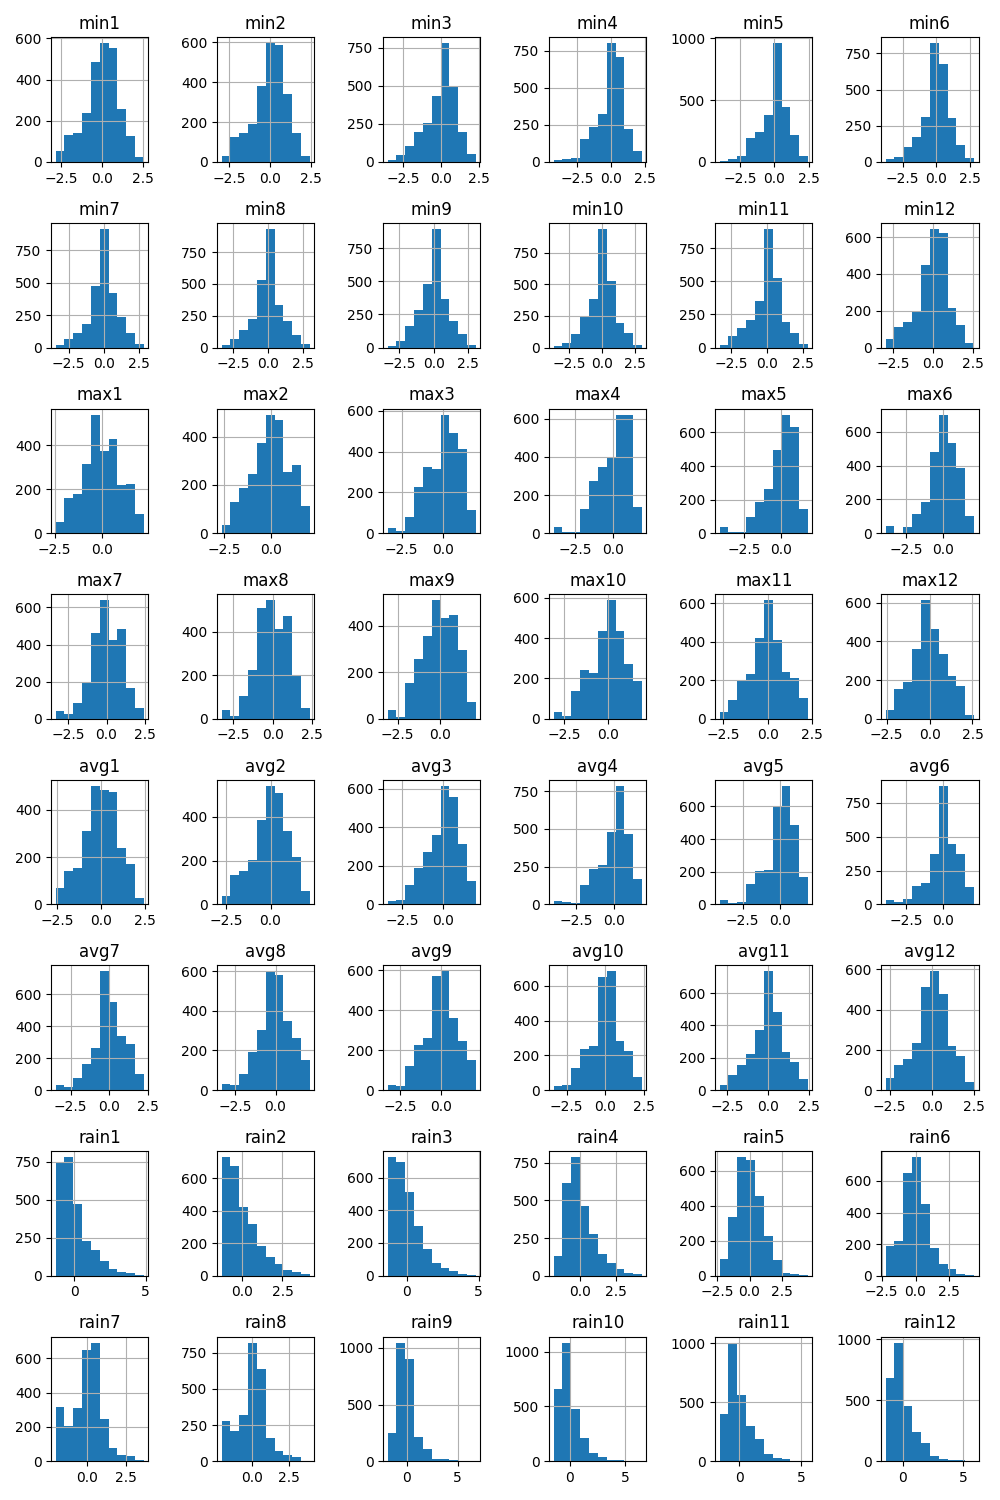

In [ ]:
# Plot histograms of attributes
X.hist(layout=(8, 6), figsize=(10, 15))
plt.tight_layout()
plt.show()

### Analysis of Normalized Climate Data Histogram

#### General Observations
- The data appears to be normalized overall.
- Most features show a distribution centered around 0, which is typical for normalized data.

#### Specific Observations on Rain Features (1 to 12)
- The rain features exhibit a left-skewed distribution.
- High values are concentrated around 0 and to the left of it.
- The distribution slowly decreases to the right, covering a wider range on the x-axis with lower heights.
- This does not follow the typical bell curve of a normal distribution.

#### Conclusion
- The normalization process seems to have worked for most features.
- The rain features' left-skewed distribution might indicate an inherent characteristic of the data or a need for further preprocessing.

## 2b

Rank of the normalized climate data: 48
First 10 singular values of the normalized climate data:
[290.16602997 150.63956473  88.47645549  59.17449467  52.11009177
  27.45679147  22.12984534  15.23769162  14.1294369   12.02665177]


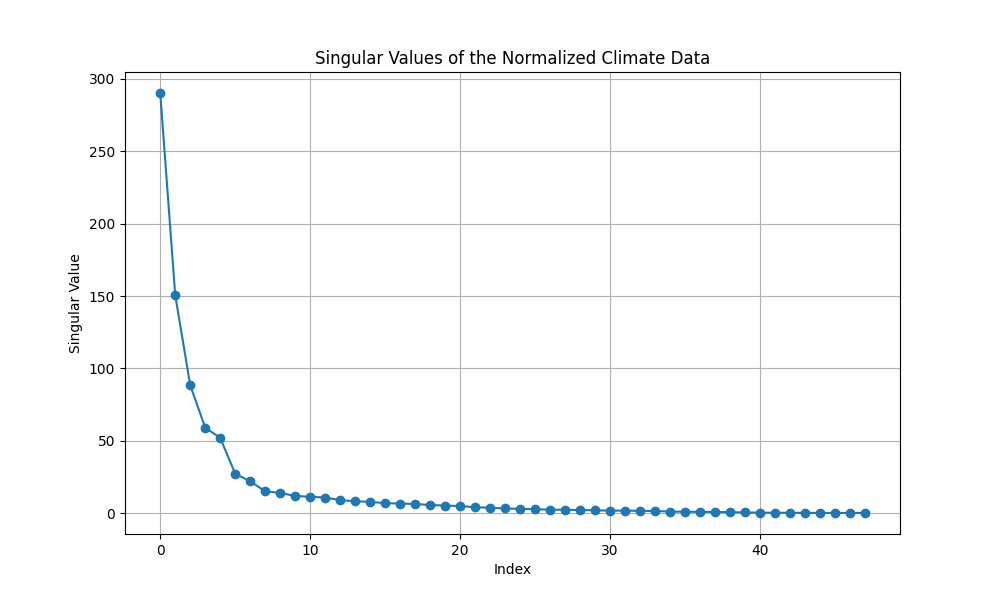

In [91]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?

# Compute the SVD of the normalized climate data
U, s, Vt = svd(X, full_matrices=False)

# Compute the rank of the data
rank_X = np.sum(s > 1e-10)

print(f"Rank of the normalized climate data: {rank_X}")
# Print the first few singular values to understand the variance captured
print("First 10 singular values of the normalized climate data:")
print(s[:10])

# Plot the singular values to visualize the variance captured by each component
plt.figure(figsize=(10, 6))
plt.plot(s, marker='o')
plt.title('Singular Values of the Normalized Climate Data')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

### Evaluation:

1. **Rank of the Data**:
     - The rank of the normalized climate data is 48, which indicates that the data matrix has full rank. This means that all 48 dimensions (features) are linearly independent and contribute to the variance in the data.

2. **Singular Values**:
     - The first singular value (290.16602997) is significantly larger than the others, indicating that the first principal component captures the most variance in the data.
     - The subsequent singular values decrease in magnitude, showing the diminishing contribution of each additional principal component to the total variance.
     - The first 10 singular values capture a substantial amount of the total variance, with the first few singular values being particularly dominant.

The SVD results suggest that the normalized climate data has a complex structure with multiple significant components. The full rank of 48 implies that all features are important for capturing the variability in the data. The dominance of the first few singular values indicates that a few principal components can explain a large portion of the variance, which is typical in high-dimensional datasets.

## 2c

The goal of the visualization is to depict the spatial distribution of the values in the first five columns of the left singular vector matrix \( U \). Each plot uses the longitude and latitude of each data point as the x and y coordinates, respectively, and the corresponding entry in the left singular vector to color each point. This helps in understanding the geographical patterns and variations captured by the singular vectors.

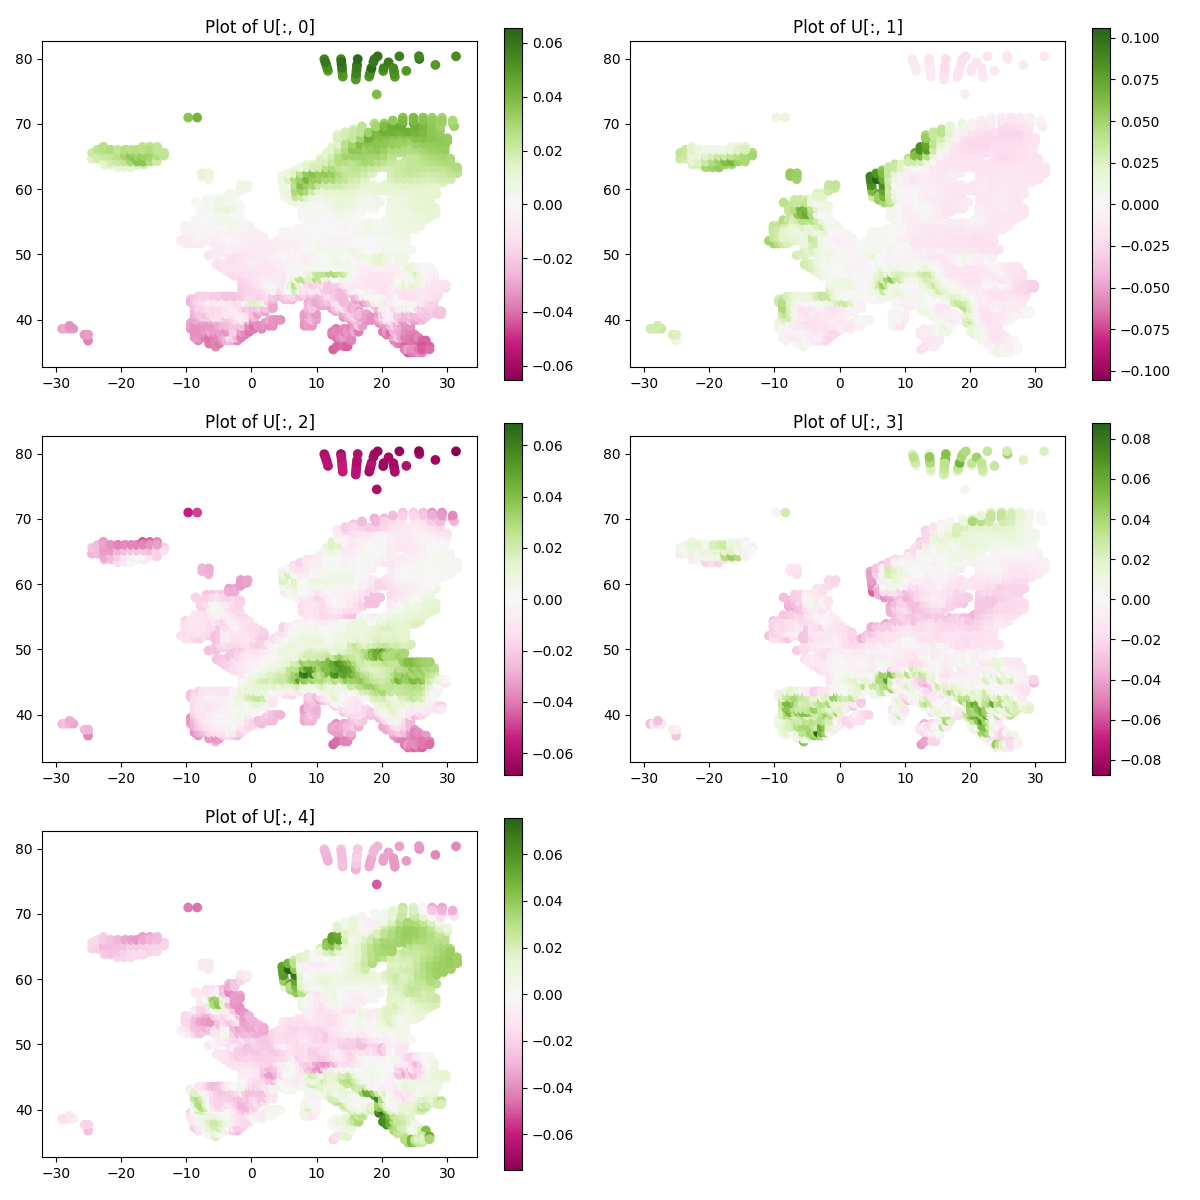

In [88]:
# Here is an example plot.
#plot_xy(lon, lat, U[:, 0])

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(5):
    plot_xy(lon, lat, U[:, i], axis=axs[i])
    axs[i].set_title(f"Plot of U[:, {i}]")
    # Remove the last axis if i == 4
    if i == 4:
        fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

### Analysis of Left Singular Vector Plots

#### General Interpretation of Singular Vectors

Each of these plots represents one of the first five singular vectors, capturing unique patterns in the dataset. The geographical coordinates (longitude and latitude) define the position of each data point, while the color scale (from pink to green) represents the intensity of each entry in the singular vector. Regions colored in green have high values, while regions in pink have low values for the given singular vector component.

Since the singular values in this dataset suggest that the first component captures a dominant portion of the variance, followed by diminishing contributions in subsequent components, we should expect the initial singular vector plots to display broad, high-variance spatial patterns, with finer variations appearing as we progress to higher-order vectors.

Plot of $U[:,0]$ (First Singular Vector)
- Description: The plot of $U[:,0]$ shows a strong contrast, with the top (north) part of the map displaying a dark green concentration, while the middle and lower areas exhibit light green to pink shades.
- Interpretation: The first singular vector captures a major climatic gradient likely associated with latitude. The green regions, possibly the northern areas, suggest distinct climate conditions (e.g., lower temperatures or different rainfall patterns) compared to more southern regions. This vector might represent a general north-south climatic gradient in Europe, consistent with the continent’s latitudinal temperature and precipitation distribution.
- Key Observation: This vector is likely dominated by temperature and seasonal variations from north to south, with a noticeable contrast that implies a primary variance direction in the climate dataset.

Plot of $U[:,1]$ (Second Singular Vector)
- Description: The plot of $U[:,1]$ reveals a more diffused pattern compared to $U[:,0]$, with light green in the center and pinkish regions along the edges.
- Interpretation: This second singular vector seems to capture a secondary pattern, possibly related to continentality (inland vs. coastal differences) or another climate gradient that differs from the primary north-south trend. The lighter central area could represent regions with moderate climate, while the edges might capture more extreme or specific local climates.
- Key Observation: This component adds additional structure, potentially reflecting subtler climatic influences such as proximity to coastlines, altitude, or distance from the ocean.

Plot of $U[:,2]$ (Third Singular Vector)
- Description: The third plot has a highly contrasting color scheme with noticeable pink patches at the top and bottom, and a stronger green band in the central region.
- Interpretation: The third singular vector might highlight localized climate characteristics, potentially capturing regional climate differences within Europe that are not purely north-south or inland-coastal. This distribution suggests a third climatic factor, perhaps linked to specific seasonal patterns or temperature extremes in certain geographic locations.
- Key Observation: The alternation between green and pink regions indicates that this vector likely captures seasonal or altitude-driven differences, where certain regions differ markedly from neighboring areas in their climate variability.

Plot of $U[:,3]$ (Fourth Singular Vector)
- Description: The fourth plot shows an even more nuanced pattern, with smaller green and pink patches scattered throughout. The coloring is more granular and less uniform, with both green and pink spots distributed in clusters.
- Interpretation: This singular vector might capture highly localized climate features or micro-climatic zones, like the north of Scandinavia and the Mediterranean. The scattered patches imply regional variability that could stem from local factors such as mountain ranges, bodies of water, or unique land formations that affect climate independently of broad regional patterns.
- Key Observation: The presence of scattered clusters in both colors points to fine-scale variations, suggesting this component picks up on minor climatic influences that impact specific areas rather than broad regional zones.

Plot of $U[:,4]$ (Fifth Singular Vector)
- Description: The fifth plot also displays a mix of green and pink, but with smaller clusters and a more balanced distribution of colors across the map. We can interpret it as a east-west-component. 
- Interpretation: The fifth singular vector likely represents even finer-scale variations or residual climatic differences that aren’t captured by the primary vectors, specifically focusing on eastern - western climate differences. This could include isolated anomalies or unique micro-climates.
- Key Observation: This vector has the smallest spatial coherence, implying it accounts for the smallest amount of variance and may capture irregularities, outlier climatic patterns, or noise in the data.

Comparative Summary and Interpretation
- Variance Explained: As we move from $U[:,0]$ to $U[:,4]$, the singular vectors capture progressively finer and more localized patterns of climate variability. The first vector represents a dominant regional trend (probably north-south climate gradient), while subsequent vectors add complexity, capturing coastal effects, regional anomalies, and local climatic peculiarities.
- Pattern Complexity: The gradual shift from large, consistent regions of color in $U[:,0]$ to scattered patches in $U[:,4]$ aligns with the decreasing singular values, reflecting a hierarchy in the strength and scale of these climatic patterns.
- Climatic Insight: The primary vectors $U[:,0]$ and $U[:,1]$ suggest broad, structural climatic trends, likely driven by latitude and geographic location within Europe. The higher-order vectors, from $U[:,2]$ onward, capture more nuanced or region-specific details, which may include unique local climates or anomalies not explained by major trends.

This visual exploration reveals that the dataset’s climate variability is highly structured, with major geographical and seasonal trends captured by the initial singular vectors, and finer, region-specific climatic features uncovered by the higher-order components. This approach illustrates how SVD can decompose complex, high-dimensional datasets into interpretable spatial and climatic patterns, capturing the hierarchy of climate variability across Europe.

In [ ]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART

## 2d

In [ ]:
# Here is an example.
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))

## 2e

In [ ]:
# 2e(i) Guttman-Kaiser
# YOUR PART

In [ ]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART

In [ ]:
# 2e(iv) entropy
# YOUR PART

In [ ]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART

## 2f

In [ ]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART
nextplot()
plt.plot()
plt.xlabel(r"Noise level ($\epsilon$)")
plt.ylabel("Reconstruction RMSE vs. original data")

# 3 SVD and k-means

In [ ]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

In [ ]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)

## 3b

In [ ]:
# YOUR PART HERE

## 3c

In [ ]:
# Compute the PCA scores, store in Z (of shape N x k)
k = 2
# YOUR PART HERE

In [ ]:
# cluster and visualize
Z_clusters = KMeans(5).fit(Z).labels_
# match clusters as well as possible (try without)
Z_clusters = match_categories(X_clusters, Z_clusters)
nextplot()
axs = plt.gcf().subplots(1, 2)
plot_xy(lon, lat, X_clusters, axis=axs[0])
axs[0].set_title("Original data")
plot_xy(lon, lat, Z_clusters, axis=axs[1])
axs[1].set_title(f"PCA $(k={k}$)")